In [1]:
# Step 1: Import Libraries for Exploratory Data Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set plotting style for better visuals
plt.style.use('default')
sns.set_palette("husl")

In [7]:
# Step 2: Load the Titanic dataset
df = pd.read_csv('Titanic_Dataset.csv')

# First look at the dataset
df.shape

(891, 12)

In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
# Step 3: Dataset Overview and Missing Value Analysis
print("=== DATASET INFO ===")
print(df.info())
print("\n=== MISSING VALUES ===")
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percentage
})
print(missing_df[missing_df['Missing Count'] > 0])

print("\n=== DATA TYPES ===")
print(df.dtypes)

=== DATASET INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

=== MISSING VALUES ===
          Missing Count  Missing Percentage
Age                 177           19.865320
Cabin               687           77.104377
Embarked              2            0.224467

=== DATA TYPES ==

In [11]:
# Step 4: Generate Summary Statistics
print("=== NUMERICAL FEATURES SUMMARY ===")
numerical_stats = df.describe()
print(numerical_stats)

=== NUMERICAL FEATURES SUMMARY ===
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [12]:
print("\n=== CATEGORICAL FEATURES SUMMARY ===")
categorical_cols = ['Sex', 'Embarked', 'Pclass']
for col in categorical_cols:
    print(f"\n{col} Distribution:")
    print(df[col].value_counts())
    print(f"{col} Proportions:")
    print(df[col].value_counts(normalize=True).round(3))


=== CATEGORICAL FEATURES SUMMARY ===

Sex Distribution:
Sex
male      577
female    314
Name: count, dtype: int64
Sex Proportions:
Sex
male      0.648
female    0.352
Name: proportion, dtype: float64

Embarked Distribution:
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64
Embarked Proportions:
Embarked
S    0.724
C    0.189
Q    0.087
Name: proportion, dtype: float64

Pclass Distribution:
Pclass
3    491
1    216
2    184
Name: count, dtype: int64
Pclass Proportions:
Pclass
3    0.551
1    0.242
2    0.207
Name: proportion, dtype: float64


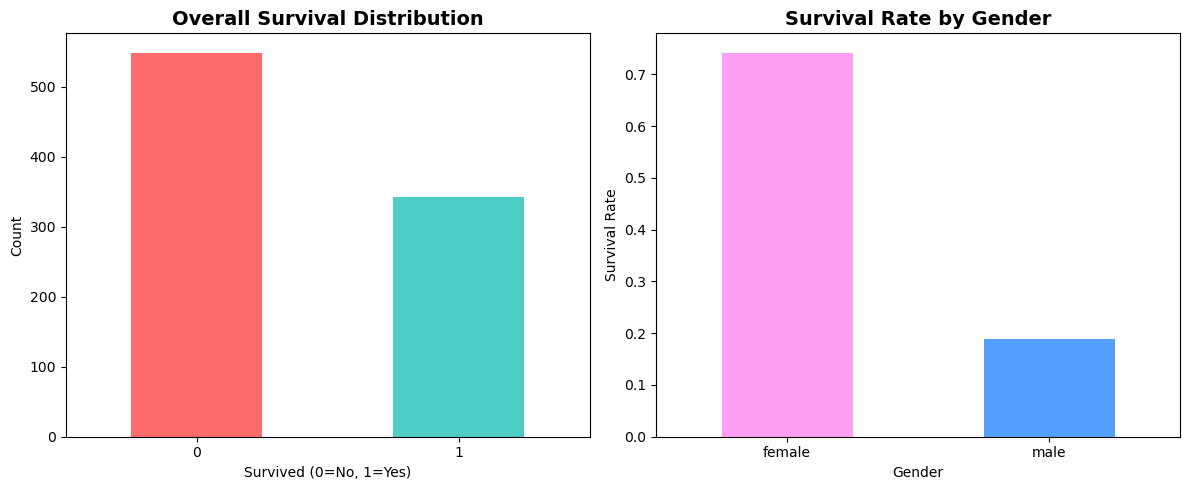

Key Insights:
• Overall survival rate: 38.4%
• Female survival rate: 74.2%
• Male survival rate: 18.9%


In [13]:
# Step 5: Target Variable Analysis - Survival Rates
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Overall survival distribution
df['Survived'].value_counts().plot(kind='bar', ax=axes[0], color=['#ff6b6b', '#4ecdc4'])
axes[0].set_title('Overall Survival Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Survived (0=No, 1=Yes)')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=0)

# Survival rate by gender
survival_by_sex = df.groupby('Sex')['Survived'].mean()
survival_by_sex.plot(kind='bar', ax=axes[1], color=['#ff9ff3', '#54a0ff'])
axes[1].set_title('Survival Rate by Gender', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Survival Rate')
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

print("Key Insights:")
print(f"• Overall survival rate: {df['Survived'].mean():.1%}")
print(f"• Female survival rate: {df[df['Sex']=='female']['Survived'].mean():.1%}")
print(f"• Male survival rate: {df[df['Sex']=='male']['Survived'].mean():.1%}")

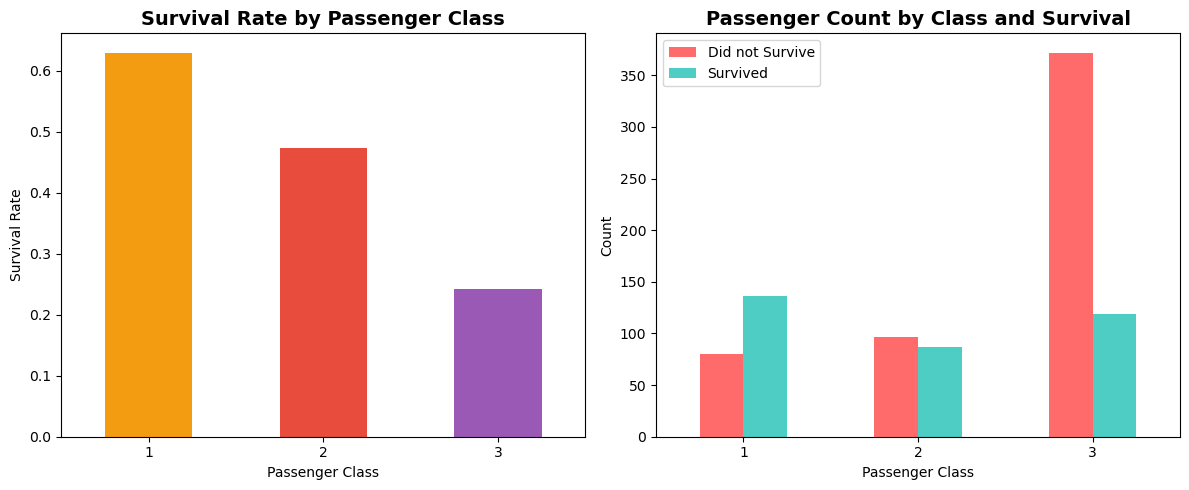

Survival Insights by Class:
• Class 1: 63.0% survival rate (216 passengers)
• Class 2: 47.3% survival rate (184 passengers)
• Class 3: 24.2% survival rate (491 passengers)


In [14]:
# Step 6: Survival Analysis by Passenger Class
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Survival rate by class
survival_by_class = df.groupby('Pclass')['Survived'].mean()
survival_by_class.plot(kind='bar', ax=axes[0], color=['#f39c12', '#e74c3c', '#9b59b6'])
axes[0].set_title('Survival Rate by Passenger Class', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Passenger Class')
axes[0].set_ylabel('Survival Rate')
axes[0].tick_params(axis='x', rotation=0)

# Count of passengers by class and survival
survival_counts = df.groupby(['Pclass', 'Survived']).size().unstack()
survival_counts.plot(kind='bar', ax=axes[1], color=['#ff6b6b', '#4ecdc4'])
axes[1].set_title('Passenger Count by Class and Survival', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Passenger Class')
axes[1].set_ylabel('Count')
axes[1].legend(['Did not Survive', 'Survived'])
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

print("Survival Insights by Class:")
for pclass in sorted(df['Pclass'].unique()):
    rate = df[df['Pclass']==pclass]['Survived'].mean()
    count = len(df[df['Pclass']==pclass])
    print(f"• Class {pclass}: {rate:.1%} survival rate ({count} passengers)")

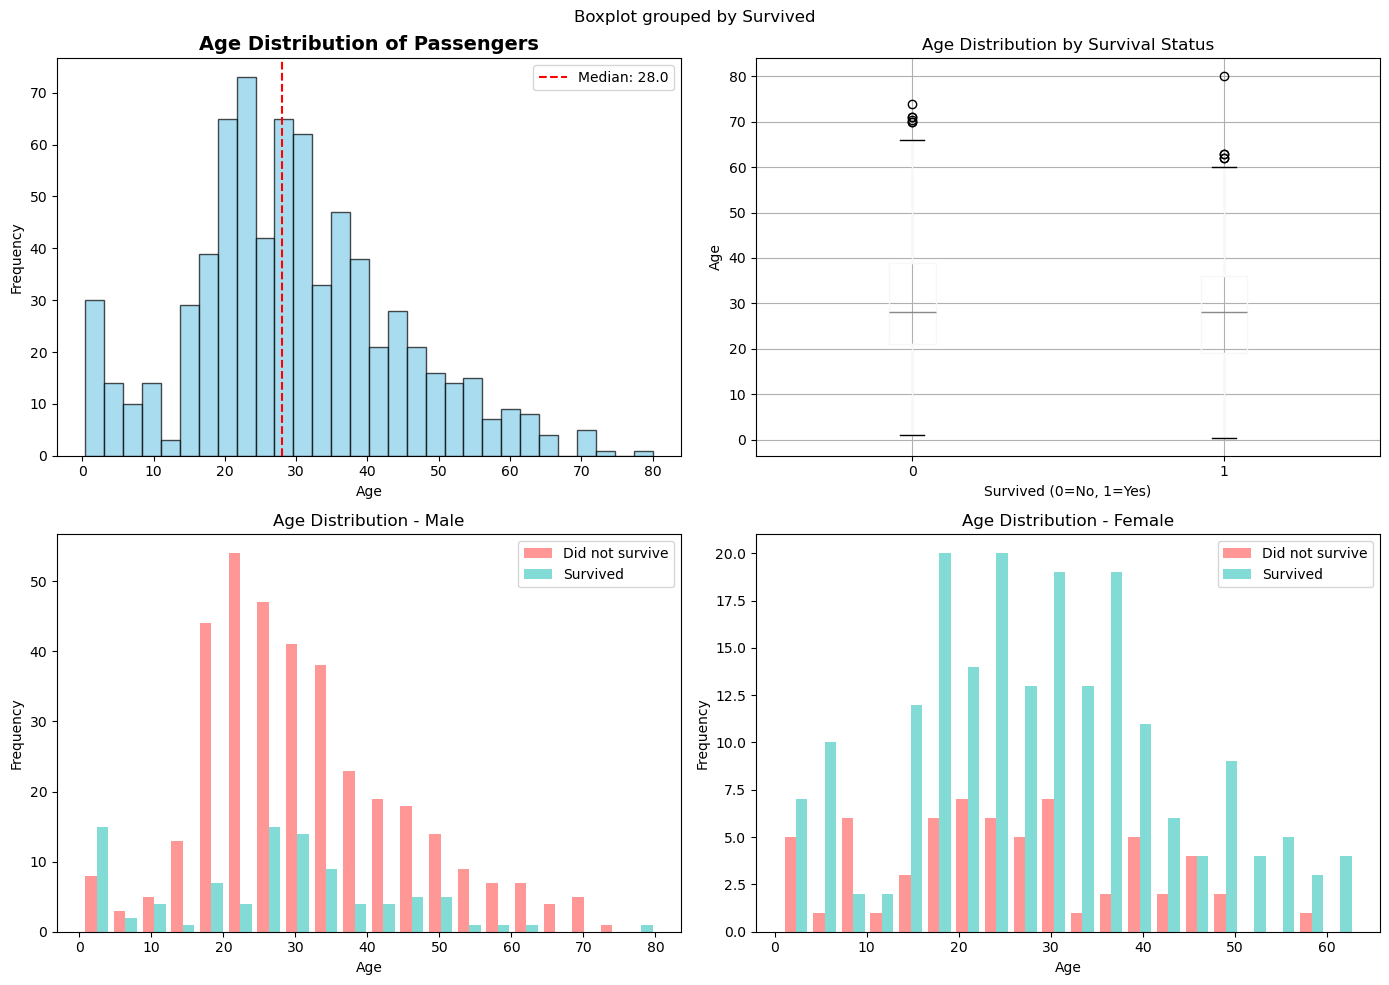

Age Insights:
• Average age: 29.7 years
• Age range: 0.4 - 80.0 years
• Survivors average age: 28.3 years
• Non-survivors average age: 30.6 years


In [15]:
# Step 7: Age Distribution and Patterns
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Age histogram
axes[0,0].hist(df['Age'].dropna(), bins=30, color='skyblue', alpha=0.7, edgecolor='black')
axes[0,0].set_title('Age Distribution of Passengers', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Age')
axes[0,0].set_ylabel('Frequency')
axes[0,0].axvline(df['Age'].median(), color='red', linestyle='--', label=f'Median: {df["Age"].median():.1f}')
axes[0,0].legend()

# Age boxplot by survival
df.boxplot(column='Age', by='Survived', ax=axes[0,1])
axes[0,1].set_title('Age Distribution by Survival Status')
axes[0,1].set_xlabel('Survived (0=No, 1=Yes)')
axes[0,1].set_ylabel('Age')

# Age by gender and survival
for i, gender in enumerate(['male', 'female']):
    gender_data = df[df['Sex'] == gender]
    axes[1,i].hist([gender_data[gender_data['Survived']==0]['Age'].dropna(), 
                    gender_data[gender_data['Survived']==1]['Age'].dropna()], 
                   bins=20, alpha=0.7, label=['Did not survive', 'Survived'], 
                   color=['#ff6b6b', '#4ecdc4'])
    axes[1,i].set_title(f'Age Distribution - {gender.title()}')
    axes[1,i].set_xlabel('Age')
    axes[1,i].set_ylabel('Frequency')
    axes[1,i].legend()

plt.tight_layout()
plt.show()

print("Age Insights:")
print(f"• Average age: {df['Age'].mean():.1f} years")
print(f"• Age range: {df['Age'].min():.1f} - {df['Age'].max():.1f} years")
print(f"• Survivors average age: {df[df['Survived']==1]['Age'].mean():.1f} years")
print(f"• Non-survivors average age: {df[df['Survived']==0]['Age'].mean():.1f} years")

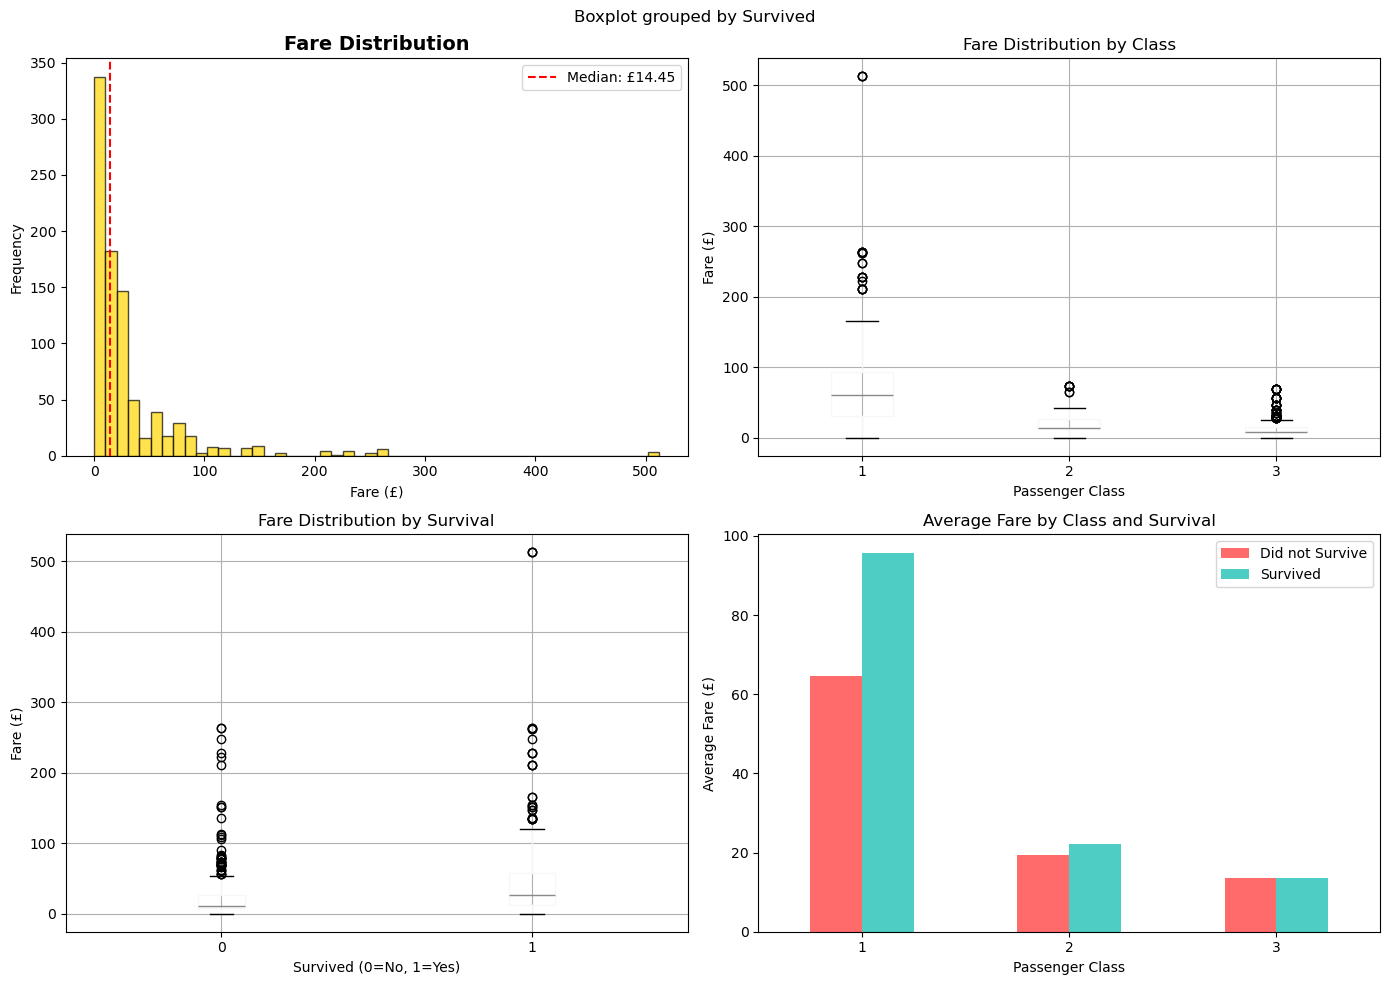

Fare Insights:
• Average fare: £32.20
• Median fare: £14.45
• Survivors average fare: £48.40
• Non-survivors average fare: £22.12


In [17]:
# Step 8: Fare Distribution and Economic Analysis
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Fare histogram (log scale due to wide range)
axes[0,0].hist(df['Fare'], bins=50, color='gold', alpha=0.7, edgecolor='black')
axes[0,0].set_title('Fare Distribution', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Fare (£)')
axes[0,0].set_ylabel('Frequency')
axes[0,0].axvline(df['Fare'].median(), color='red', linestyle='--', label=f'Median: £{df["Fare"].median():.2f}')
axes[0,0].legend()

# Fare by class
df.boxplot(column='Fare', by='Pclass', ax=axes[0,1])
axes[0,1].set_title('Fare Distribution by Class')
axes[0,1].set_xlabel('Passenger Class')
axes[0,1].set_ylabel('Fare (£)')

# Fare by survival
df.boxplot(column='Fare', by='Survived', ax=axes[1,0])
axes[1,0].set_title('Fare Distribution by Survival')
axes[1,0].set_xlabel('Survived (0=No, 1=Yes)')
axes[1,0].set_ylabel('Fare (£)')

# Average fare by class and survival
fare_survival = df.groupby(['Pclass', 'Survived'])['Fare'].mean().unstack()
fare_survival.plot(kind='bar', ax=axes[1,1], color=['#ff6b6b', '#4ecdc4'])
axes[1,1].set_title('Average Fare by Class and Survival')
axes[1,1].set_xlabel('Passenger Class')
axes[1,1].set_ylabel('Average Fare (£)')
axes[1,1].legend(['Did not Survive', 'Survived'])
axes[1,1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

print("Fare Insights:")
print(f"• Average fare: £{df['Fare'].mean():.2f}")
print(f"• Median fare: £{df['Fare'].median():.2f}")
print(f"• Survivors average fare: £{df[df['Survived']==1]['Fare'].mean():.2f}")
print(f"• Non-survivors average fare: £{df[df['Survived']==0]['Fare'].mean():.2f}")

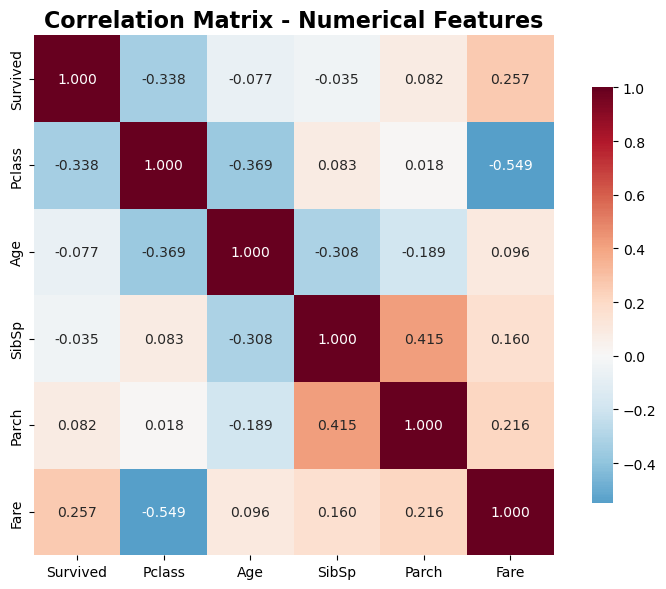

Key Correlations with Survival:
• Pclass: -0.338 (negative correlation)
• Fare: 0.257 (positive correlation)
• Parch: 0.082 (positive correlation)
• Age: -0.077 (negative correlation)
• SibSp: -0.035 (negative correlation)

Strongest correlations:
• Fare ↔ Pclass: -0.549 (higher class = higher fare)
• SibSp ↔ Parch: 0.415 (family relationships)


In [23]:
# Step 9: Correlation Matrix Analysis

# Select numerical columns for correlation
numerical_cols = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
correlation_matrix = df[numerical_cols].corr()

# Create correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='RdBu_r', 
            center=0,
            square=True,
            fmt='.3f',
            cbar_kws={"shrink": .8})
plt.title('Correlation Matrix - Numerical Features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("Key Correlations with Survival:")
survival_corr = correlation_matrix['Survived'].sort_values(key=abs, ascending=False)[1:]
for feature, corr in survival_corr.items():
    direction = "positive" if corr > 0 else "negative"
    print(f"• {feature}: {corr:.3f} ({direction} correlation)")

print(f"\nStrongest correlations:")
print(f"• Fare ↔ Pclass: {correlation_matrix.loc['Fare', 'Pclass']:.3f} (higher class = higher fare)")
print(f"• SibSp ↔ Parch: {correlation_matrix.loc['SibSp', 'Parch']:.3f} (family relationships)")

<Figure size 800x600 with 0 Axes>

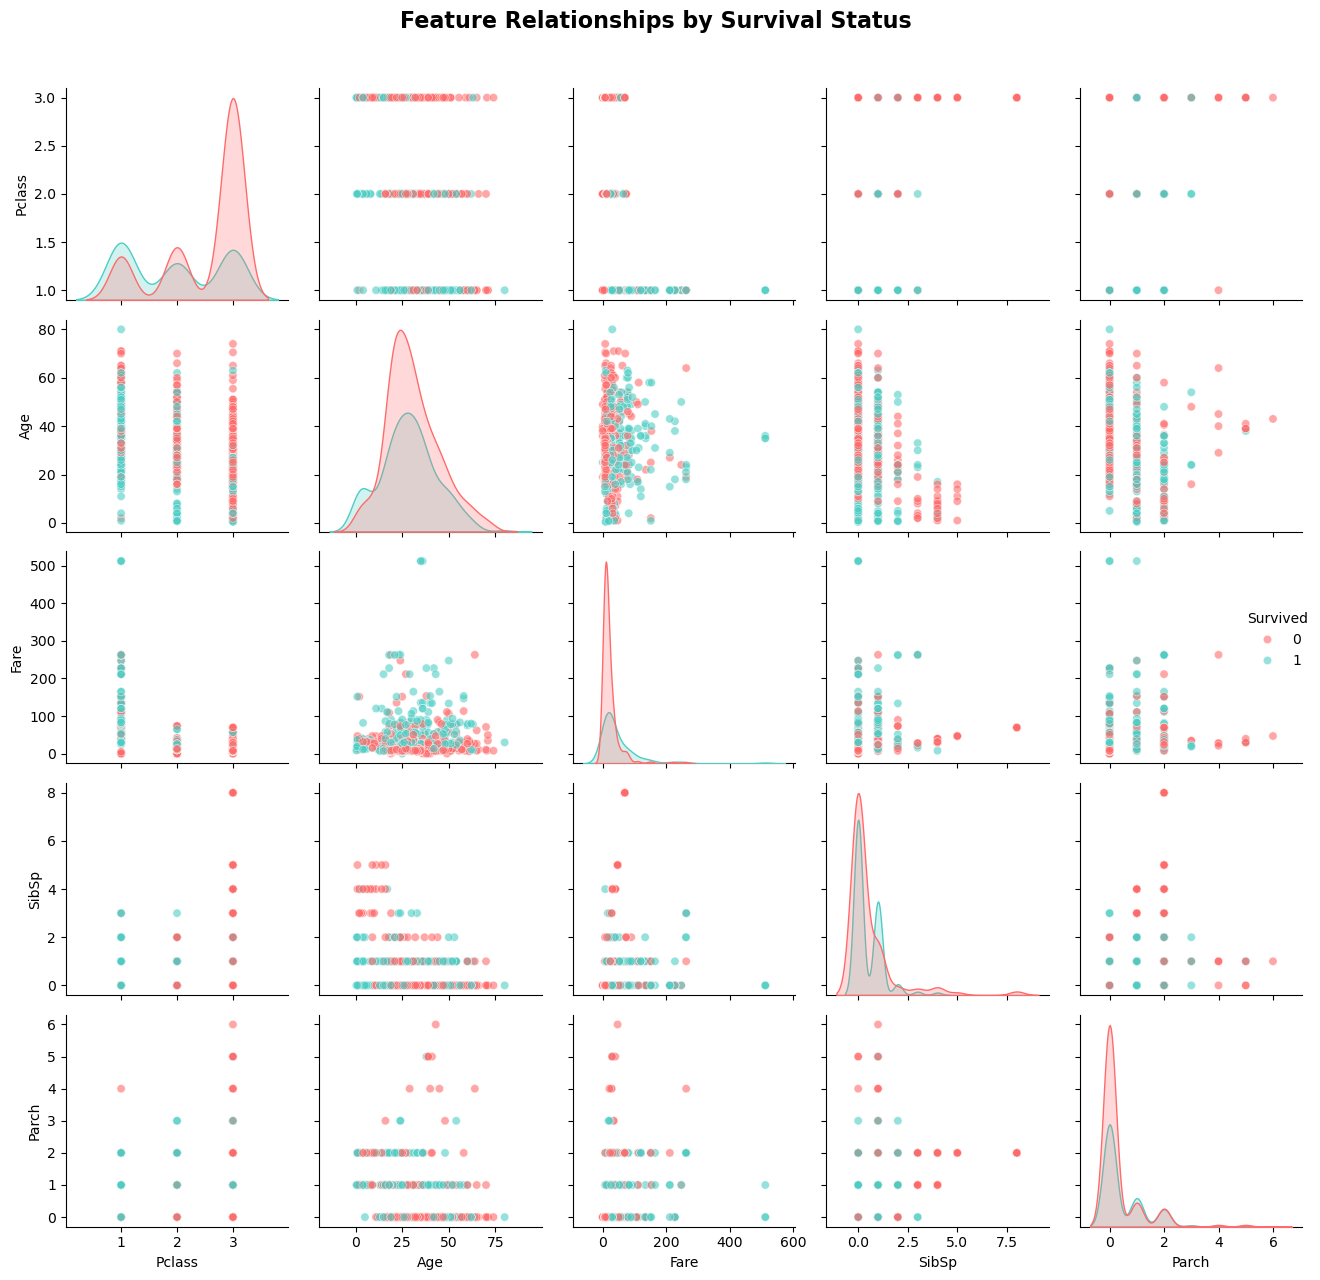

=== FINAL EDA SUMMARY & INSIGHTS ===

KEY SURVIVAL FACTORS:
• Gender: Women had 74.2% vs men's 18.9% survival rate
• Class: 1st class 63.0% vs 3rd class 24.2% survival rate
• Economics: Survivors paid £48.40 avg vs £22.12 for non-survivors
• Age: Slight advantage for younger passengers (28.3 vs 30.6 avg age)

DATA QUALITY NOTES:
• Age missing: 19.9% - consider imputation strategies
• Cabin missing: 77.1% - likely not useful for modeling
• Embarked missing: 0.2% - easily handled

ANOMALIES & PATTERNS:
• Fare range: £0-512 (extreme outliers present)
• Family size correlation: SibSp & Parch show positive relationship
• Class-fare alignment: Strong negative correlation (-0.549)


In [25]:
# Step 10: Pairplot for Feature Relationships

# Create a subset for cleaner visualization
plot_features = ['Survived', 'Pclass', 'Age', 'Fare', 'SibSp', 'Parch']
plot_data = df[plot_features].copy()

# Create pairplot
plt.figure(figsize=(8, 6))
sns.pairplot(plot_data, 
             hue='Survived', 
             diag_kind='kde',
             plot_kws={'alpha': 0.6},
             palette=['#ff6b6b', '#4ecdc4'])
plt.suptitle('Feature Relationships by Survival Status', y=1.02, fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("=== FINAL EDA SUMMARY & INSIGHTS ===")
print("\nKEY SURVIVAL FACTORS:")
print("• Gender: Women had 74.2% vs men's 18.9% survival rate")
print("• Class: 1st class 63.0% vs 3rd class 24.2% survival rate") 
print("• Economics: Survivors paid £48.40 avg vs £22.12 for non-survivors")
print("• Age: Slight advantage for younger passengers (28.3 vs 30.6 avg age)")

print("\nDATA QUALITY NOTES:")
print("• Age missing: 19.9% - consider imputation strategies")
print("• Cabin missing: 77.1% - likely not useful for modeling")
print("• Embarked missing: 0.2% - easily handled")

print("\nANOMALIES & PATTERNS:")
print("• Fare range: £0-512 (extreme outliers present)")
print("• Family size correlation: SibSp & Parch show positive relationship")
print("• Class-fare alignment: Strong negative correlation (-0.549)")

In [26]:
# Step 11: Advanced Analysis & Business Recommendations
print("=== ADVANCED INSIGHTS FOR ML MODELING ===")

# Feature engineering opportunities
print("\nFEATURE ENGINEERING OPPORTUNITIES:")
print("• Create 'FamilySize' = SibSp + Parch + 1")
print("• Extract 'Title' from Name (Mr, Mrs, Miss, Master)")
print("• Bin Age into categories (Child, Adult, Senior)")
print("• Create 'IsAlone' binary feature from family size")

# Model-ready insights
print("\nMODEL-READY INSIGHTS:")
print("• Target: 61.6% class imbalance (consider stratified sampling)")
print("• Top predictors: Pclass (-0.338), Fare (0.257), Gender")
print("• Feature scaling needed: Fare has wide range (0-512)")
print("• Handle missing Age: Median imputation or regression-based")

# Business insights
print("\nHISTORICAL BUSINESS INSIGHTS:")
print("• Social protocol: 'Women and children first' clearly evident")
print("• Economic disparity: Wealth directly correlated with survival")
print("• Location matters: Class determined deck level/lifeboat access")
print("• Family dynamics: Small families had slight survival advantage")

print("\nEDA COMPLETE - READY FOR FEATURE ENGINEERING & MODELING!")

=== ADVANCED INSIGHTS FOR ML MODELING ===

FEATURE ENGINEERING OPPORTUNITIES:
• Create 'FamilySize' = SibSp + Parch + 1
• Extract 'Title' from Name (Mr, Mrs, Miss, Master)
• Bin Age into categories (Child, Adult, Senior)
• Create 'IsAlone' binary feature from family size

MODEL-READY INSIGHTS:
• Target: 61.6% class imbalance (consider stratified sampling)
• Top predictors: Pclass (-0.338), Fare (0.257), Gender
• Feature scaling needed: Fare has wide range (0-512)
• Handle missing Age: Median imputation or regression-based

HISTORICAL BUSINESS INSIGHTS:
• Social protocol: 'Women and children first' clearly evident
• Economic disparity: Wealth directly correlated with survival
• Location matters: Class determined deck level/lifeboat access
• Family dynamics: Small families had slight survival advantage

EDA COMPLETE - READY FOR FEATURE ENGINEERING & MODELING!
